In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

#
#
#
# EXERCISE - 1

In [2]:
#Importign all the csv files and merging them together
d1 = pd.read_csv('DEMO_D.csv')
d2 = pd.read_csv('BPX_D.csv')
d3 = pd.read_csv('TCHOL_D.csv')
d4 = pd.merge(d1, d2)
df = pd.merge(d4, d3)

In [3]:
#Performing some initial head() operation to read the dataset.
d4.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A
0,31127.0,4.0,2.0,1.0,11.0,12.0,5.397605e-79,3.0,NaN,NaN,NaN,1.0,41.0,NaN,100.0,NaN
1,31128.0,4.0,2.0,2.0,132.0,132.0,1.100000e+01,4.0,4.0,NaN,1.0,1.0,401.0,NaN,NaN,2.0
2,31129.0,4.0,2.0,1.0,189.0,190.0,1.500000e+01,4.0,10.0,NaN,1.0,1.0,664.0,NaN,NaN,1.0
3,31130.0,4.0,2.0,2.0,NaN,NaN,8.500000e+01,3.0,NaN,4.0,NaN,2.0,NaN,4.0,NaN,2.0
4,31131.0,4.0,2.0,2.0,535.0,536.0,4.400000e+01,4.0,NaN,4.0,NaN,1.0,827.0,NaN,NaN,2.0


In [5]:
#using describe() function to get a better understanding
df.describe(include='all')

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI
count,8086.000000,8086.0,8086.0,8086.000000,7938.000000,7917.000000,8086.000000,8086.000000,3.312000e+03,4773.000000,3076.000000,8086.000000,7805.000000,360.000000,356.000000,7455.000000,7360.000000,7360.000000
mean,36306.897724,4.0,2.0,1.514098,400.234316,400.949476,33.858150,2.825377,7.583635e+00,3.282003,1.365085,1.079520,612.427931,49.138889,88.550562,1.709323,184.471060,4.770417
std,2982.445660,0.0,0.0,0.499832,261.916565,261.822792,22.720599,1.212358,7.526794e+00,1.297236,0.650956,0.378434,207.804768,38.372353,14.027347,0.454105,42.844203,1.107979
min,31128.000000,4.0,2.0,1.000000,72.000000,72.000000,6.000000,1.000000,5.397605e-79,1.000000,1.000000,1.000000,5.000000,1.000000,58.000000,1.000000,78.000000,2.020000
25%,33737.250000,4.0,2.0,1.000000,182.000000,183.000000,15.000000,1.000000,4.000000e+00,2.000000,1.000000,1.000000,551.000000,4.000000,80.000000,1.000000,155.000000,4.010000
50%,36311.500000,4.0,2.0,2.000000,315.000000,316.000000,27.000000,3.000000,7.000000e+00,3.000000,1.000000,1.000000,631.000000,56.000000,88.000000,2.000000,179.000000,4.630000
75%,38878.750000,4.0,2.0,2.000000,596.000000,597.000000,51.000000,4.000000,1.000000e+01,4.000000,2.000000,1.000000,720.000000,99.000000,94.500000,2.000000,209.000000,5.400000
max,41474.000000,4.0,2.0,2.000000,1019.000000,1019.000000,85.000000,5.000000,9.900000e+01,9.000000,3.000000,3.000000,2679.000000,99.000000,240.000000,2.000000,615.000000,15.900000


In [6]:
#analyzing null values

df.isnull().sum()

SEQN           0
SDDSRVYR       0
RIDSTATR       0
RIAGENDR       0
RIDAGEMN     148
RIDAGEEX     169
RIDAGEYR       0
RIDRETH1       0
DMDEDUC3    4774
DMDEDUC2    3313
DMDSCHOL    5010
PEASCST1       0
PEASCTM1     281
PEASCCT1    7726
BPXCHR      7730
BPQ150A      631
LBXTC        726
LBDTCSI      726
dtype: int64

In [7]:
#Understanding the datatype of the columns

df.dtypes

SEQN        float64
SDDSRVYR    float64
RIDSTATR    float64
RIAGENDR    float64
RIDAGEMN    float64
RIDAGEEX    float64
RIDAGEYR    float64
RIDRETH1    float64
DMDEDUC3    float64
DMDEDUC2    float64
DMDSCHOL    float64
PEASCST1    float64
PEASCTM1    float64
PEASCCT1    float64
BPXCHR      float64
BPQ150A     float64
LBXTC       float64
LBDTCSI     float64
dtype: object

### If we convert Age in Years into months and merge with Age in month. we can handlw null values

In [8]:
month_age = df['RIDAGEMN'] #processing age by month

In [9]:
month_age

0       132.0
1       189.0
2         NaN
3       535.0
4       842.0
        ...  
8081    235.0
8082    148.0
8083    410.0
8084    255.0
8085    200.0
Name: RIDAGEMN, Length: 8086, dtype: float64

<AxesSubplot:xlabel='SEQN', ylabel='RIDAGEMN'>

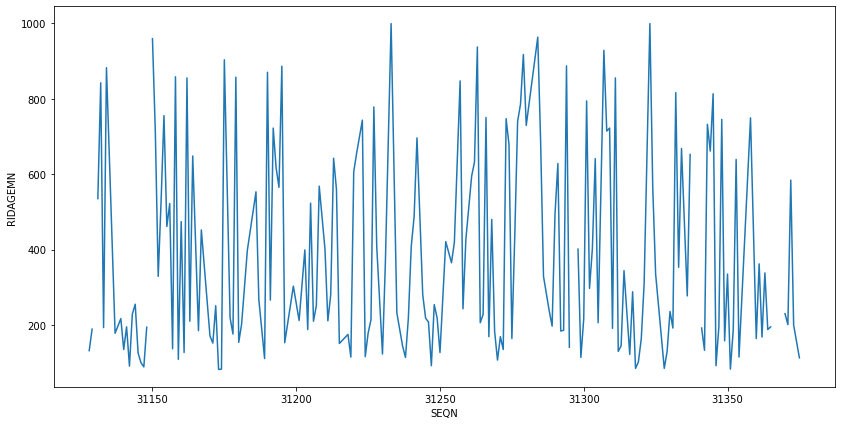

In [10]:
#Vizualizing the data into a line plot to analyze the flow

plt.figure(figsize=(14,7))
sns.lineplot(data = df[:200], x = "SEQN", y = "RIDAGEMN",)

In [11]:
df['AGE_AT_SCREENING'] =df.RIDAGEMN.fillna(df.RIDAGEYR * 12)

<AxesSubplot:xlabel='SEQN', ylabel='AGE_AT_SCREENING'>

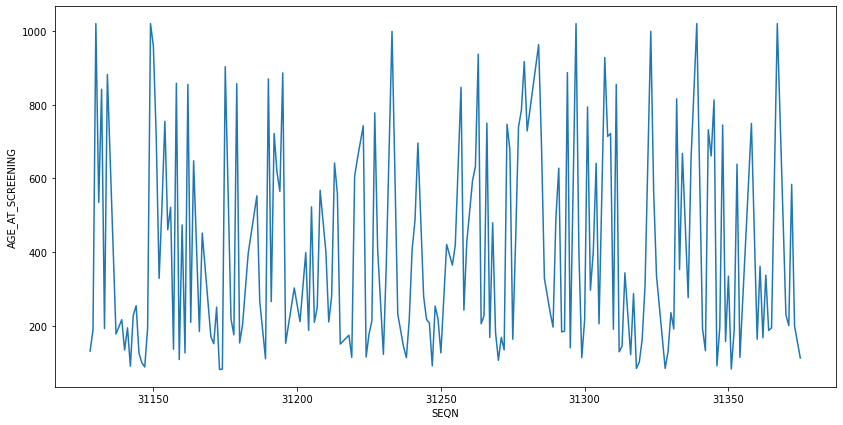

In [12]:
#Vizualizing the data into a line plot to analyze the flow

plt.figure(figsize=(14,7))
sns.lineplot(data = df[:200], x = "SEQN", y = "AGE_AT_SCREENING",)

#### If we look at the column AGE_AT_SCREENING has no missing values. This erases most of the errors and keeps almost the real index data. 

In [13]:
df.isnull().sum()

SEQN                   0
SDDSRVYR               0
RIDSTATR               0
RIAGENDR               0
RIDAGEMN             148
RIDAGEEX             169
RIDAGEYR               0
RIDRETH1               0
DMDEDUC3            4774
DMDEDUC2            3313
DMDSCHOL            5010
PEASCST1               0
PEASCTM1             281
PEASCCT1            7726
BPXCHR              7730
BPQ150A              631
LBXTC                726
LBDTCSI              726
AGE_AT_SCREENING       0
dtype: int64

#### For AGE_AT_EXAM we can use a logical approach. So, the exam was conducted probably 1 and half month ago. After doing analysis, most of the people got a month older. We can add one more month with AGE_AT_SCREENING and it will help us handle the null values. 

In [14]:
#Processing age at the time of Exam and plotting it into a lineplot to see the flow. 

df['AGE_AT_EXAM'] =df.AGE_AT_SCREENING + 1

In [15]:
df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI,AGE_AT_SCREENING,AGE_AT_EXAM
0,31128.0,4.0,2.0,2.0,132.0,132.0,11.0,4.0,4.0,NaN,1.0,1.0,401.0,NaN,NaN,2.0,129.0,3.34,132.0,133.0
1,31129.0,4.0,2.0,1.0,189.0,190.0,15.0,4.0,10.0,NaN,1.0,1.0,664.0,NaN,NaN,1.0,170.0,4.40,189.0,190.0
2,31130.0,4.0,2.0,2.0,NaN,NaN,85.0,3.0,NaN,4.0,NaN,2.0,NaN,4.0,NaN,2.0,NaN,NaN,1020.0,1021.0
3,31131.0,4.0,2.0,2.0,535.0,536.0,44.0,4.0,NaN,4.0,NaN,1.0,827.0,NaN,NaN,2.0,105.0,2.72,535.0,536.0
4,31132.0,4.0,2.0,1.0,842.0,843.0,70.0,3.0,NaN,5.0,NaN,1.0,730.0,NaN,NaN,2.0,147.0,3.80,842.0,843.0


<AxesSubplot:xlabel='SEQN', ylabel='AGE_AT_EXAM'>

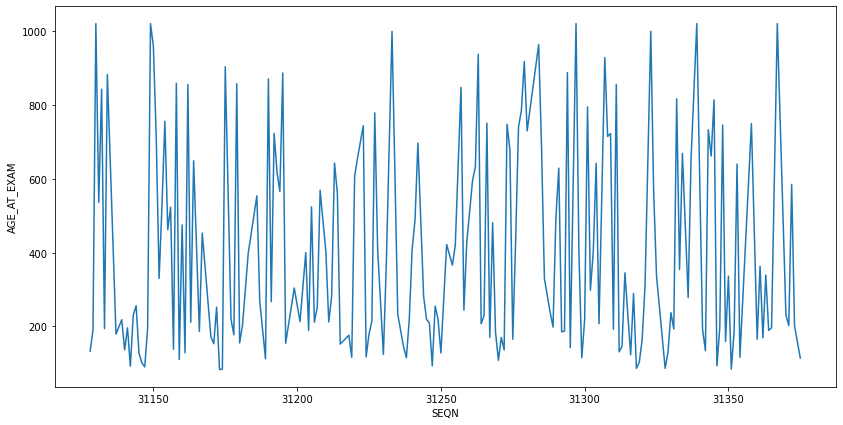

In [16]:
plt.figure(figsize=(14,7))
sns.lineplot(data = df[:200], x = "SEQN", y = "AGE_AT_EXAM",)

In [17]:
df.isnull().sum()

SEQN                   0
SDDSRVYR               0
RIDSTATR               0
RIAGENDR               0
RIDAGEMN             148
RIDAGEEX             169
RIDAGEYR               0
RIDRETH1               0
DMDEDUC3            4774
DMDEDUC2            3313
DMDSCHOL            5010
PEASCST1               0
PEASCTM1             281
PEASCCT1            7726
BPXCHR              7730
BPQ150A              631
LBXTC                726
LBDTCSI              726
AGE_AT_SCREENING       0
AGE_AT_EXAM            0
dtype: int64

#### So collectively the indexes has almost all values. The null cells in DMDEDUC3 are filled in DMDEDUC2 and vise versa. Merging them will help us to fill the missing values. 

<AxesSubplot:xlabel='SEQN', ylabel='DMDEDUC3'>

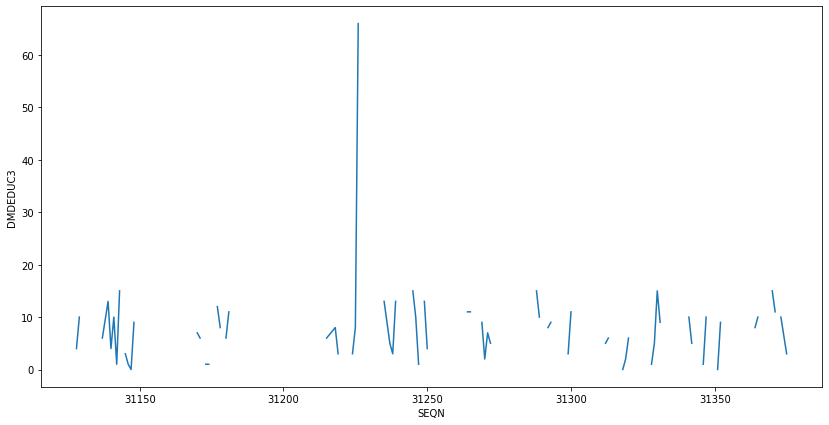

In [18]:
#Vizualizing the data into a line plot to analyze the flow

plt.figure(figsize=(14,7))
sns.lineplot(data = df[:200], x = "SEQN", y = "DMDEDUC3",)

<AxesSubplot:xlabel='SEQN', ylabel='DMDEDUC2'>

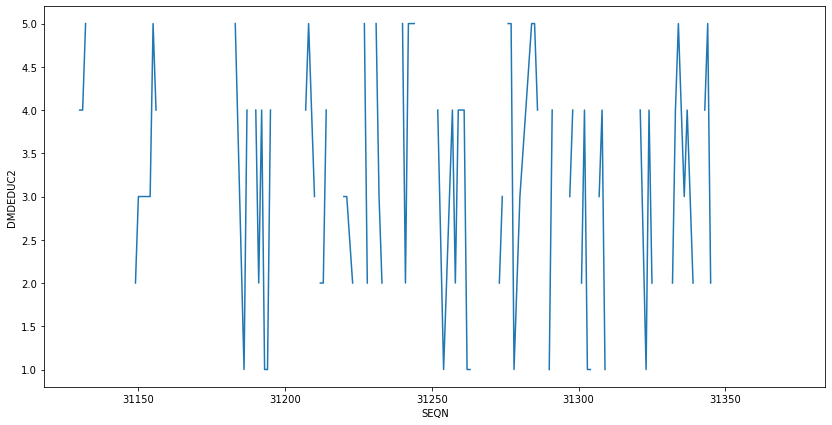

In [19]:
#Vizualizing the data into a line plot to analyze the flow

plt.figure(figsize=(14,7))
sns.lineplot(data = df[:200], x = "SEQN", y = "DMDEDUC2",)

In [20]:
#Filling the null values and processing the indexes.

df["HIGHEST_EDUCATION"] =  df.DMDEDUC3.fillna(df.DMDEDUC2)

In [21]:
df.isnull().sum()

SEQN                    0
SDDSRVYR                0
RIDSTATR                0
RIAGENDR                0
RIDAGEMN              148
RIDAGEEX              169
RIDAGEYR                0
RIDRETH1                0
DMDEDUC3             4774
DMDEDUC2             3313
DMDSCHOL             5010
PEASCST1                0
PEASCTM1              281
PEASCCT1             7726
BPXCHR               7730
BPQ150A               631
LBXTC                 726
LBDTCSI               726
AGE_AT_SCREENING        0
AGE_AT_EXAM             0
HIGHEST_EDUCATION       1
dtype: int64

#### Since this only null value is not processable anymore. I dedcided to drop this row. 

In [22]:
#dropping the only row with unrecoverable information.

df=df.dropna(subset=['HIGHEST_EDUCATION'], axis = 0)

In [23]:
df.isnull().sum()

SEQN                    0
SDDSRVYR                0
RIDSTATR                0
RIAGENDR                0
RIDAGEMN              148
RIDAGEEX              169
RIDAGEYR                0
RIDRETH1                0
DMDEDUC3             4773
DMDEDUC2             3312
DMDSCHOL             5009
PEASCST1                0
PEASCTM1              281
PEASCCT1             7725
BPXCHR               7730
BPQ150A               630
LBXTC                 725
LBDTCSI               725
AGE_AT_SCREENING        0
AGE_AT_EXAM             0
HIGHEST_EDUCATION       0
dtype: int64

<AxesSubplot:xlabel='SEQN', ylabel='HIGHEST_EDUCATION'>

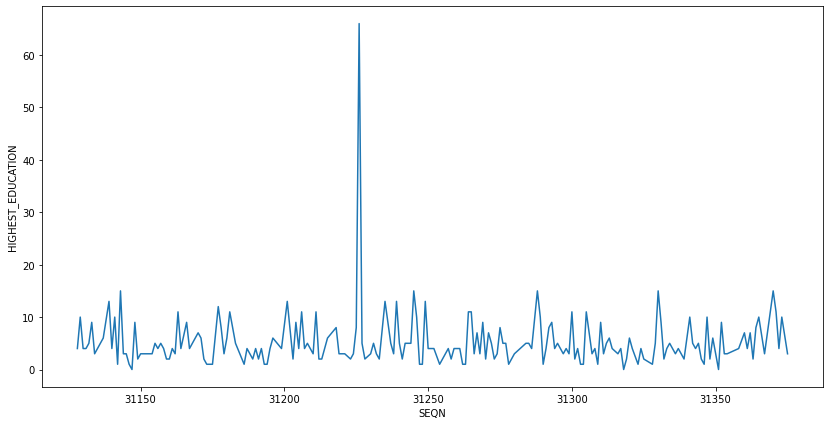

In [24]:
#Visualizing the processing column to understand the flow and validate the processing

plt.figure(figsize=(14,7))
sns.lineplot(data = df[:200], x = "SEQN", y = "HIGHEST_EDUCATION")

In [25]:
df5 = pd.read_csv("DEMO_RETIRED.CSV")

In [26]:
df_above = df.drop(['SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEMN', 'RIDAGEEX', 
              'RIDRETH1', 'DMDEDUC3', 'DMDEDUC2', 'DMDSCHOL', 'PEASCST1',
               'PEASCTM1', 'PEASCCT1', 'BPXCHR', 'BPQ150A', 'LBXTC', 'LBDTCSI',
               'AGE_AT_SCREENING', 'AGE_AT_EXAM', 'HIGHEST_EDUCATION'], axis= 1)

### Since majority of senior citizens retire at the age of 65. Rarely we can see that there are few people left in the list who are above 65 and still working. Therefore, we should add 1 into the column with the age above 65

In [27]:
df_retired = pd.merge(df5, df_above)

In [28]:
df_retired.head()

,SEQN,RETIRED,RIDAGEYR
0,31128.0,0.0,11.0
1,31129.0,0.0,15.0
2,31130.0,1.0,85.0
3,31131.0,0.0,44.0
4,31132.0,1.0,70.0


In [29]:
df_retired.isnull().sum()

SEQN        0
RETIRED     0
RIDAGEYR    0
dtype: int64

<AxesSubplot:xlabel='RETIRED', ylabel='RIDAGEYR'>

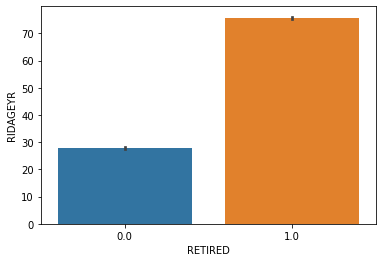

In [30]:
sns.barplot(data=df_retired, x = "RETIRED", y = "RIDAGEYR")

############################################################################################################################### 
# 
# 
# 
# 
# EXERCISE - 2 

In [50]:
model_training = pd.read_csv("claim_prediction.csv") # Importing CSV
model_training.columns #Extract the features

Index(['EADDC', 'EAFXA', 'FDDBC', 'AFDDA', 'AXCXA', 'EXCCE', 'FBXFC', 'DFFEC',
       'CEXAE', 'BBADX', 'CLAIM'],
      dtype='object')

In [51]:
#spliting data into 2 variables named X and Y. Where X is for training data and Y is the target column. 
X = model_training.drop(['EADDC', 'EAFXA', 'FDDBC', 'AFDDA', 'AXCXA', 'EXCCE', 'FBXFC', 'DFFEC',
       'CEXAE', 'BBADX',], axis = 1) 
Y= model_training.pop("CLAIM")

In [57]:
#Splitting data into 4 different variable for training machine
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size= 0.7, test_size = 0.3) 

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Application of Support Vector Machine - Classifier
model = SVC(kernel='linear') # Using Linear Kernel
model.fit(xtrain, ytrain) # Model training

y_val_pred = model.predict(xtest) # Predicting y_val from x_val [val == validation set]

In [59]:
from sklearn import metrics
print("Model Accuracy:",metrics.accuracy_score(ytest, y_val_pred))

Model Accuracy: 1.0


In [60]:
model_training['predicted claims'] = model.predict(X)

In [61]:
model_training

,EADDC,EAFXA,FDDBC,AFDDA,AXCXA,EXCCE,FBXFC,DFFEC,CEXAE,BBADX,predicted claims
0,-0.193513,0.021062,-0.870351,4.314903,-4.260162,-1.259531,0.175603,-0.942903,2.333260,4.678712,0
1,2.667844,-3.195978,2.718651,-0.885312,2.964261,2.161336,2.008505,-0.296360,-0.610780,-2.545978,1
2,2.280602,0.048539,-2.179863,-0.380866,-1.212960,2.097278,5.131315,-1.250050,2.362880,2.207307,0
3,0.592376,-1.590548,2.329976,-1.416489,1.743390,3.040990,2.371740,-0.190549,0.890761,-2.671923,0
4,1.236896,-0.656180,-0.381064,-2.332379,0.660684,2.055621,0.478162,-0.269513,2.614886,-3.655301,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,-2.335387,-0.002498,-1.408110,0.165536,1.823881,-1.854583,-2.988482,4.724027,-3.539125,-2.042808,1
9996,-3.402228,-0.512133,0.333368,0.440717,-4.619738,1.600502,-2.607152,-2.944162,-0.748114,0.706500,0
9997,-4.360472,-1.574251,0.017482,2.229508,0.397852,2.244527,-0.521251,0.220012,-1.724677,2.508082,1
9998,1.524260,-0.948040,-0.746293,2.532038,-2.383154,-3.038132,4.939401,-2.274399,3.431807,1.361872,1


#
#
#
### Here is the predicted model with 100% accuracy. I used SVM to achieve better and quick results. 

#
#
#
#
#
#
#
# EXERCISE - 3

QUESTION # 1:  What is one way to determine the number of clusters in K-Means clustering? How would you
estimate the efficacy, or quality, of the K-means clustering results?

    ANSWER: We can use Elbow method to determine the number of cluster in k means.
            If it is 0 –> the sample is very close to the neighboring clusters.
            It it is 1 –> the sample is far away from the neighboring clusters.
            It it is -1 –> the sample is assigned to the wrong clusters.
        
QUESTION # 2: Your linear regression model is suffering from low bias and high variance. What steps can you
take to improve your model?

    ANSWER: The model have been overfitted. Means the model has been fed more training data but less validation data. We can balance the ratio and run the model again to evaluate the model performance. 


QUESTION # 3: Below is a scenario for training error (TE) and validation error (VE) for several iterations of a
machine learning model. Which model would you choose, and why?

    ANSWER: I will select SVM classfier because it can reduce and perform better in this kind situation. 


QUESTION # 4: You have built a model for a binary classification problem. The trained model was applied to the
validation dataset and produced the results documented in the following confusion matrix.

    ANSWER: a. 
            PRECISION = 0.942
            RECALL = 0.669
            
            b. So far the classifier is working fine. most of the predictions fall under right metric. For cancer we need to be focused on precision because we can't afford postively affected patients to be determined as normal. 
            
            c. We need to focus on recall. Because recall can suggest random videos as a new content to viewer. 
            

#############################################################################################################################
# 
# 
# 
# 
# 
# EXERCISE # 4

In [ ]:
#detecting Anomolies with BoxPlot Visualizer

<AxesSubplot:>

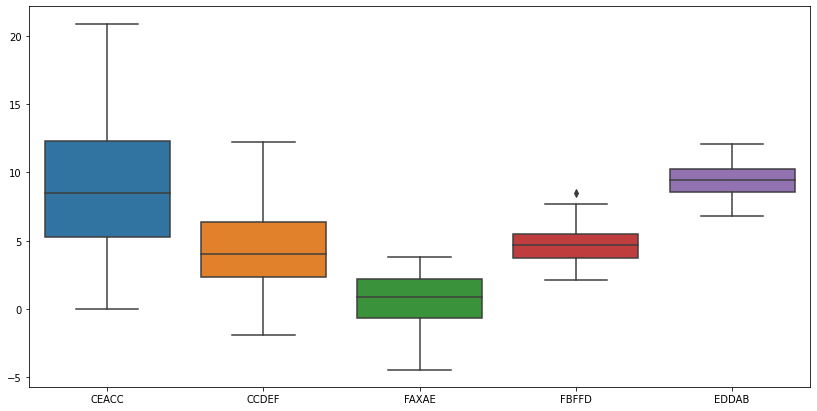

In [71]:
data = pd.read_csv("anomaly_detection.csv")

plt.figure(figsize=(14,7))

sns.boxplot(data=data)

In [65]:
from sklearn.cluster import DBSCAN

#predicting anomalies with DBSCAN cluster model.
outlier_detection = DBSCAN(min_samples = 2, eps = 3)
clusters = outlier_detection.fit_predict(data)
list(clusters).count(-1)

2